Imports

In [90]:
pwd

'/Users/naveedrafi/PycharmProjects/DS-Nanodegree/DS-Blog/Notebooks'

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import collections
import itertools
%matplotlib inline


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 150)

Load the data and understand it

In [55]:
survey_df = pd.read_csv('/Users/naveedrafi/PycharmProjects/DS-Nanodegree/DS-Blog/Data/SO_dev_survey/survey_results_public.csv')
schema_df = pd.read_csv('/Users/naveedrafi/PycharmProjects/DS-Nanodegree/DS-Blog/Data/SO_dev_survey/survey_results_schema.csv')

# describe the data

# how many people have we surveyed?
print(survey_df.shape[0])

# how many questions did we ask?
print(schema_df.shape[0])

survey_df.describe()

51392
154


,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


List of column names

In [56]:
# list(survey_df.columns)

Sample data

In [57]:
survey_df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new opportunities",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stack Overflow,9.0,Deskto

In [58]:
# In this question we will look at Languages that respondents are most familiar with vs what are the most highly prized ones in the future.

Function to get question description

In [59]:
# get the full question for a column

def get_question(col_name, schema_df):    
    return list(schema_df[schema_df['Column']==col_name]['Question'])[0]

In [86]:
get_question('HaveWorkedLanguage', schema_df)

# Note: The question about have worked vs want to work are the same.

'Which of the following languages have you done extensive development work in over the past year, and which do you want to work in over the next year?'

In [103]:
# util function
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = collections.defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

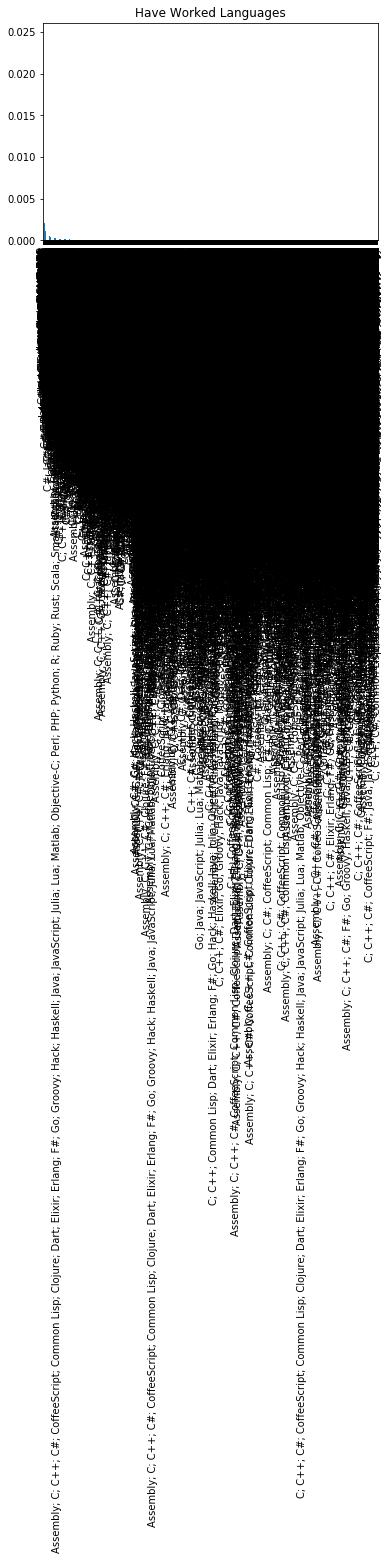

In [85]:
# To visualise the different we will make a plot
# lets use have worked languages first
(survey_df['HaveWorkedLanguage'].value_counts()/survey_df.shape[0]).plot(kind="bar");
plt.title("Have Worked Languages");

# this is really messy so we will clean our data a little bit

In [127]:
# clean
# lets drop rows where we don't have a response
survey_df_drop_worked = survey_df.dropna(subset=['HaveWorkedLanguage'], axis=0)

# What is the set of all avaialbe options from the survey?
worked_languages = list(collections.Counter(itertools.chain.from_iterable(v.split(';') for v in survey_df_drop_worked.HaveWorkedLanguage)))
worked_languages = [x.strip(' ') for x in worked_languages]
worked_languages = list(dict.fromkeys(worked_languages))

# repeat for languages that people want to work on 
# lets drop rows where we don't have a response
survey_df_drop_want_work = survey_df.dropna(subset=['WantWorkLanguage'], axis=0).astype(str)

# What is the set ofall avaialbe options from the survey?
work_languages = list(collections.Counter(itertools.chain.from_iterable(v.split(';') for v in survey_df_drop_want_work.HaveWorkedLanguage)))
work_languages = [x.strip(' ') for x in worked_languages]
work_languages = list(dict.fromkeys(worked_languages))

# looks like both lists have the same languages
list(set(worked_languages) - set(work_languages))

[]

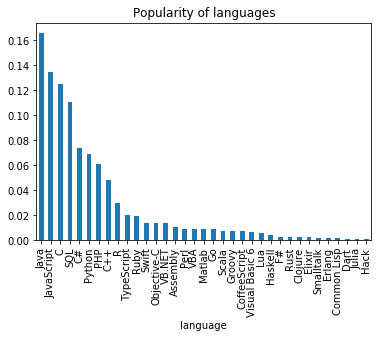

In [128]:

# we can take any list as both are same
possible_vals = worked_languages

def clean_and_plot(df, column_name, title='Popularity of languages', plot=True):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    study = df[column_name].value_counts().reset_index()
    study.rename(columns={'index': 'language', column_name: 'count'}, inplace=True)
    study_df = total_count(study, 'language', 'count', possible_vals)

    study_df.set_index('language', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df
    
top_languages_now = clean_and_plot(survey_df_drop_worked, column_name='HaveWorkedLanguage')

In [129]:
top_languages_now

,count
language,
Java,0.165675
JavaScript,0.134634
C,0.124617
SQL,0.110379
C#,0.073429
Python,0.068886
PHP,0.060563
C++,0.047997
R,0.029728


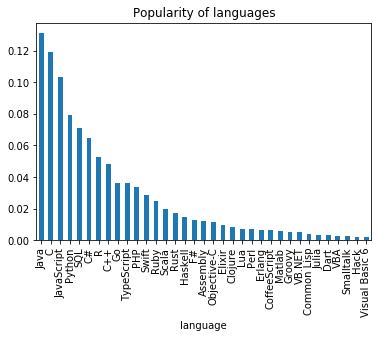

In [130]:
top_languages_future = clean_and_plot(survey_df_drop_want_work, column_name='WantWorkLanguage')

In [131]:
top_languages_future

,count
language,
Java,0.131235
C,0.119135
JavaScript,0.103326
Python,0.079550
SQL,0.070987
C#,0.064469
R,0.052603
C++,0.048394
Go,0.036516


In [132]:
comp_df = pd.merge(top_languages_now, top_languages_future, left_index=True, right_index=True)
comp_df.columns = ['Past', 'Future']
comp_df['Diff_Popularity'] = comp_df['Future'] - comp_df['Past']
comp_df.style.bar(subset=['Diff_Popularity'], align='mid', color=['#d65f5f', '#5fba7d'])

,Past,Future,Diff_Popularity
language,,,
Java,0.165675,0.131235,-0.0344397
JavaScript,0.134634,0.103326,-0.0313078
C,0.124617,0.119135,-0.00548168
SQL,0.110379,0.0709874,-0.0393919
C#,0.0734293,0.064469,-0.0089603
Python,0.0688856,0.0795499,0.0106644
PHP,0.0605633,0.0339527,-0.0266106
C++,0.0479974,0.0483944,0.000397036
R,0.0297284,0.0526029,0.0228746
